In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

In [0]:
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d lantian773030/pokemonclassification

 99% 411M/417M [00:06<00:00, 56.5MB/s]
100% 417M/417M [00:06<00:00, 67.0MB/s]


In [0]:
import os
from zipfile import ZipFile
with ZipFile('pokemonclassification.zip', 'r') as zipObj:
   # Extract all the contents of zip file in the data directory
   zipObj.extractall('./data/')
print("done")

done


In [0]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D, UpSampling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
import keras

from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os

Using TensorFlow backend.


In [0]:
def ae():
    autoencoder = Sequential()
    chanDim = -1
    # encoder part
    autoencoder.add(Conv2D(64, (3,3), strides=1, padding="same", input_shape=image_dim))
    autoencoder.add(BatchNormalization(axis=chanDim))
    autoencoder.add(Activation('relu'))
    autoencoder.add(AveragePooling2D((2,2), padding="same"))

    autoencoder.add(Conv2D(32, (3,3), strides=1, padding="same"))
    autoencoder.add(BatchNormalization(axis=chanDim))
    autoencoder.add(Activation('relu'))
    autoencoder.add(AveragePooling2D((2,2), padding="same"))

    
    #decoder part
    autoencoder.add(Conv2D(32, (3,3), strides=1, padding="same"))
    autoencoder.add(BatchNormalization(axis=chanDim))
    autoencoder.add(Activation('relu'))
    autoencoder.add(UpSampling2D((2, 2)))

    autoencoder.add(Conv2D(64, (3,3), strides=1, padding="same"))
    autoencoder.add(BatchNormalization(axis=chanDim))
    autoencoder.add(Activation('relu'))
    autoencoder.add(UpSampling2D((2, 2)))

    autoencoder.add(Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

    return autoencoder

In [0]:
e = 200
lr = 0.001
bs = 16
image_dim = (128,128,3)

In [0]:
data = []
count = 0

print("Loading images : ")
pokemon_paths = list(paths.list_images("data"))
pokemon_paths = sorted(pokemon_paths)
now_pokemon = ''
for pokemon_path in pokemon_paths:
    pokemon_name = pokemon_path.split(os.path.sep)[-2]
    if(pokemon_name != now_pokemon):
        now_pokemon = pokemon_name
        print(f"reading {now_pokemon}'s images")
    image = cv2.imread(pokemon_path)
    image = cv2.resize(image, (image_dim[1], image_dim[0]))
    image = img_to_array(image)

    data.append(image)
    

Loading images : 
reading Abra's images
reading Aerodactyl's images
reading Alakazam's images
reading Alolan Sandslash's images
reading Arbok's images
reading Arcanine's images
reading Articuno's images
reading Beedrill's images
reading Bellsprout's images
reading Blastoise's images
reading Bulbasaur's images
reading Butterfree's images
reading Caterpie's images
reading Chansey's images
reading Charizard's images
reading Charmander's images
reading Charmeleon's images
reading Clefable's images
reading Clefairy's images
reading Cloyster's images
reading Cubone's images
reading Dewgong's images
reading Diglett's images
reading Ditto's images
reading Dodrio's images
reading Doduo's images
reading Dragonair's images
reading Dragonite's images
reading Dratini's images
reading Drowzee's images
reading Dugtrio's images
reading Eevee's images
reading Ekans's images
reading Electabuzz's images
reading Electrode's images
reading Exeggcute's images
reading Exeggutor's images
reading Farfetchd's i

In [0]:
len(data)

6820

In [0]:
data = np.array(data) /255.0

print("model create")
model = ae()

model create


In [0]:
print("compile model")
model.compile(loss=keras.losses.categorical_crossentropy, 
    optimizer=keras.optimizers.Adam(lr=lr), 
    metrics=['accuracy'])
print(model.summary())

compile model
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
activation_5 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
average_pooling2d_3 (Average (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 64, 

In [31]:
print("training")
training_history = model.fit(data, data, bs, e, validation_data=(data,data), verbose=2)

training
Train on 6820 samples, validate on 6820 samples
Epoch 1/200
 - 53s - loss: 1.8626 - accuracy: 0.7870 - val_loss: 1.8633 - val_accuracy: 0.7405
Epoch 2/200
 - 53s - loss: 1.8626 - accuracy: 0.7913 - val_loss: 1.8631 - val_accuracy: 0.7773
Epoch 3/200
 - 53s - loss: 1.8626 - accuracy: 0.7944 - val_loss: 1.8628 - val_accuracy: 0.8066
Epoch 4/200
 - 53s - loss: 1.8626 - accuracy: 0.7894 - val_loss: 1.8630 - val_accuracy: 0.7445
Epoch 5/200
 - 53s - loss: 1.8626 - accuracy: 0.7911 - val_loss: 1.8630 - val_accuracy: 0.7830
Epoch 6/200
 - 53s - loss: 1.8626 - accuracy: 0.7842 - val_loss: 1.8628 - val_accuracy: 0.7520
Epoch 7/200
 - 52s - loss: 1.8626 - accuracy: 0.7805 - val_loss: 1.8631 - val_accuracy: 0.8477
Epoch 8/200
 - 53s - loss: 1.8626 - accuracy: 0.7852 - val_loss: 1.8630 - val_accuracy: 0.7057
Epoch 9/200
 - 53s - loss: 1.8626 - accuracy: 0.7968 - val_loss: 1.8628 - val_accuracy: 0.6958
Epoch 10/200
 - 53s - loss: 1.8627 - accuracy: 0.7810 - val_loss: 1.8632 - val_accuracy:

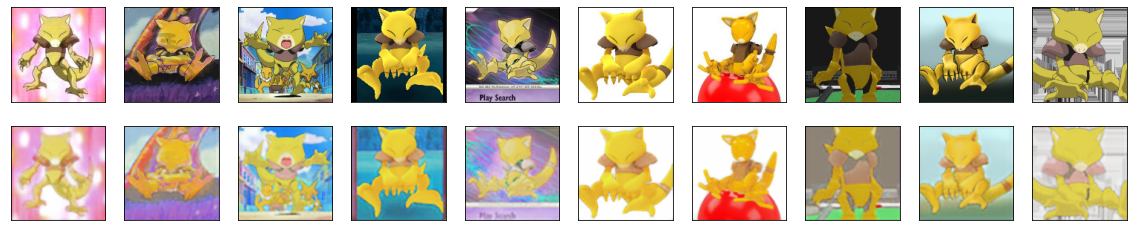

In [33]:
%matplotlib inline

predicted = model.predict(data[:10].reshape(-1,128, 128, 3))

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([data[:10], predicted], axes):
    for img, ax in zip(images, row):
        #ax.imshow(img)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [0]:
model.save("pokemon_autoencoder.h5")